# Logistic Regression

## Logistic Regression Algorithm
Logistic Regression is a classification algorithm that calculates the probability that a sample belongs to a class. It has an "S" shaped curve called the sigmoid function.

The formular for logistic regression is: y = 1 / (1 + e^(-z))
y is the probability that a sample belongs to a class and z is the linear combination of the features

The algorithm is as follows:
* initialize the weights
* calculate the predicted values
* calculate the error
* update the weights
* repeat the steps above until convergence

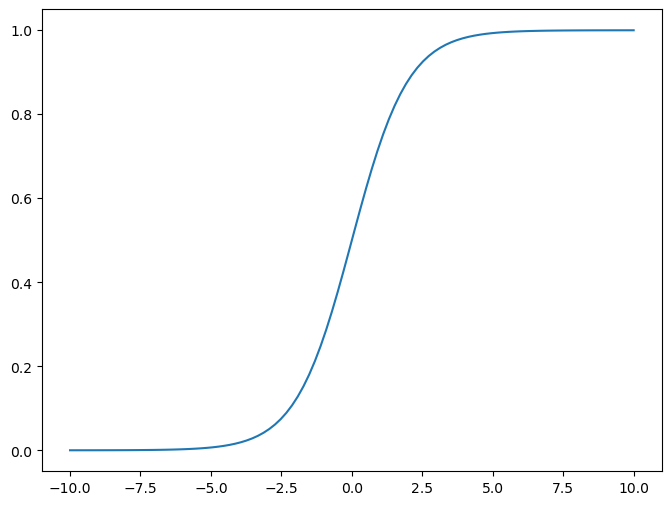

In [1]:
# plot a sigmoid function
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(-10, 10, 100)
y = 1 / (1 + np.exp(-x))
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y)

<Axes: xlabel='x', ylabel='y'>

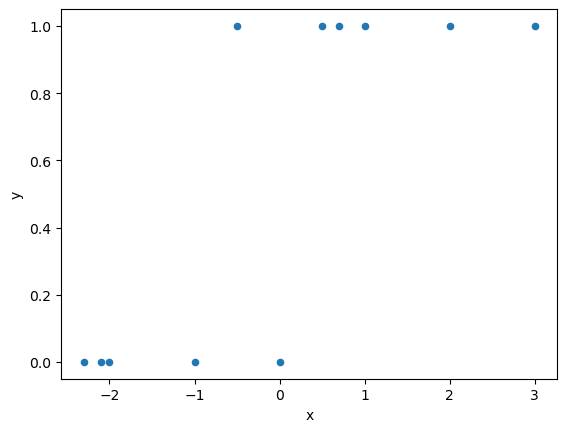

In [ ]:
import pandas as pd
log_data = pd.DataFrame(
  {'x': [-2,-2.3,-2.1,-1,-.5,0,.5,.7,1,2,3],
   'y': [ 0,   0,   0, 0,  1,0, 1, 1,1,1,1]}
)
log_data.plot.scatter(x='x', y='y')

In [3]:
from sklearn.linear_model import LogisticRegression
log_r = LogisticRegression()
log_r.fit(log_data[['x']], log_data['y'])

LogisticRegression()

In [4]:
log_r.coef_

array([[1.24748205]])

In [5]:
log_r.intercept_

array([0.455222])

Text(2, 0.4, 'Predict 1\n right of this')

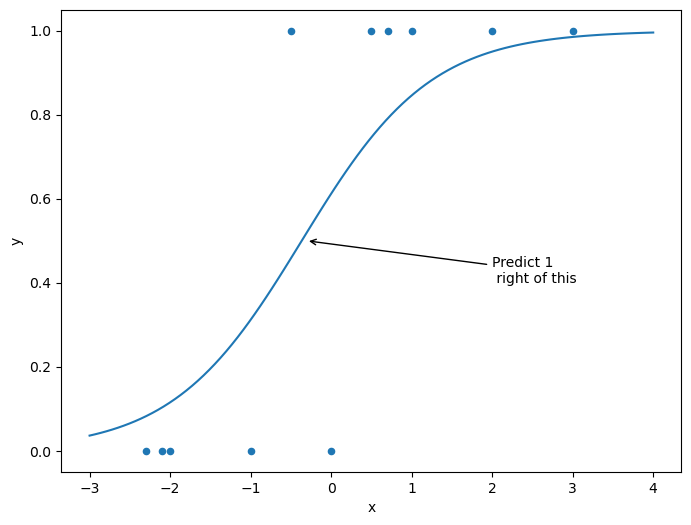

In [12]:
# plot fitted sigmoid function on top of data
x = np.linspace(-3, 4, 100)
z = log_r.coef_[0][0] * x + log_r.intercept_[0]
y = 1 / (1 + np.exp(-z))
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y)
log_data.plot.scatter(x='x', y='y', ax=ax)
# annotate above .5
ax.annotate('Predict 1\n right of this', 
            xy=(-.31, .5), xytext=(2, .4), arrowprops={'arrowstyle': '->'})

In [13]:
log_r.predict([[-.3]])

c:\Users\jiang1\AppData\Local\miniconda3\envs\amla\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

## Real World Example with eye movements

In [38]:
# https://www.openml.org/search?type=data&status=active&id=1044
import pandas as pd
from scipy.io import arff

data, _ = arff.loadarff("eye_movements.arff")
eye_df = pd.DataFrame(data)

# convert column binary values to integers
btoi = lambda x: int(x.decode('utf-8')) if isinstance(x, bytes) else x
for col in eye_df.columns:
    if eye_df[col].dtype == 'object':
        eye_df[col] = eye_df[col].apply(btoi)

eye_df.head()

,lineNo,assgNo,fixcount,firstPassCnt,P1stFixation,P2stFixation,prevFixDur,firstfixDur,firstPassFixDur,nextFixDur,...,regressLen,nextWordRegress,regressDur,pupilDiamMax,pupilDiamLag,timePrtctg,nWordsInTitle,titleNo,wordNo,label
0,1.0,1.0,1.0,1.0,1,0,0.0,100.0,100.0,99.0,...,0.0,0,0.0,0.0095,0.145,0.0131,7.0,4.0,3.0,0
1,2.0,1.0,1.0,1.0,1,0,99.0,278.0,278.0,159.0,...,0.0,0,0.0,0.0095,0.183,0.0363,7.0,1.0,1.0,0
2,3.0,1.0,1.0,1.0,1,0,278.0,159.0,159.0,159.0,...,0.0,0,0.0,0.0370,0.183,0.0208,7.0,1.0,3.0,0
3,4.0,1.0,1.0,1.0,1,0,159.0,159.0,159.0,139.0,...,0.0,0,0.0,0.0370,0.183,0.0208,7.0,1.0,5.0,0
4,5.0,1.0,1.0,1.0,1,0,159.0,139.0,139.0,239.0,...,0.0,0,0.0,0.0390,0.183,0.0182,7.0,1.0,6.0,0


In [39]:
from sklearn.preprocessing import StandardScaler

X = eye_df.drop(columns=['label'])
y = eye_df['label']

std = StandardScaler()
X_scaled = std.fit_transform(X)

eye_log = LogisticRegression()
eye_log.fit(X_scaled, y)
eye_log.score(X_scaled, y)

0.5094184345281638

<Axes: >

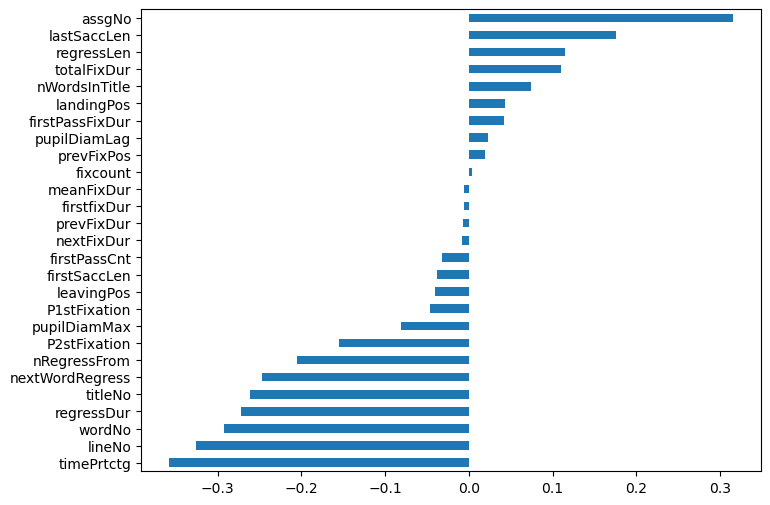

In [42]:
pd.Series(eye_log.coef_[0], index=X.columns).sort_values().plot.barh(figsize=(8, 6))

In [44]:
import pandas as pd
raw = pd.read_csv('titanic.csv')
data = raw.loc[:, ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].dropna()
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [ ]:
# confirm there is no na values
data.isna().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [46]:
# standardize the data
from sklearn.preprocessing import StandardScaler
from sklearn import set_config

set_config(transform_output='pandas')
std = StandardScaler()
X = std.fit_transform(data)
X.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,-0.82702,0.911232,-0.530377,0.524570,-0.505895,-0.518978
1,1.20916,-1.476364,0.571831,0.524570,-0.505895,0.691897
2,1.20916,0.911232,-0.254825,-0.551703,-0.505895,-0.506214
3,1.20916,-1.476364,0.365167,0.524570,-0.505895,0.348049
4,-0.82702,0.911232,0.365167,-0.551703,-0.505895,-0.503850


In [ ]:
# split the data
y = raw.loc[X.index, 'Survived']
y.head()

1.0

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

1.0

In [56]:
# try an XGBoost model
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

1.0